<a href="https://colab.research.google.com/github/AmitPress/google-colab/blob/main/fastai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/'images')
len(files)

7390

In [5]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_92.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_2.jpg'))

In [6]:
def label_func(f): return f[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls

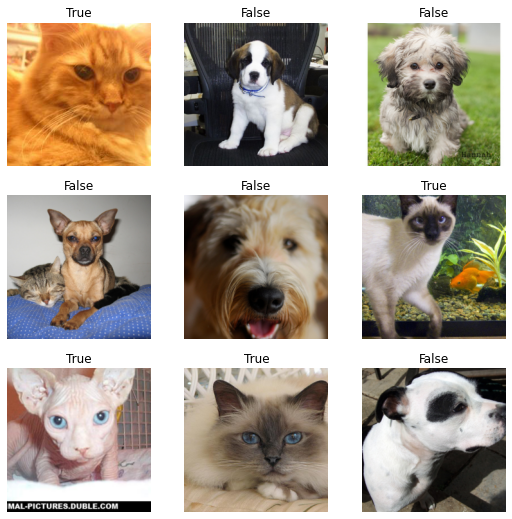

In [8]:
dls.show_batch()

In [9]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [10]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.153715,0.018527,0.994587,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.051423,0.019147,0.991881,00:52


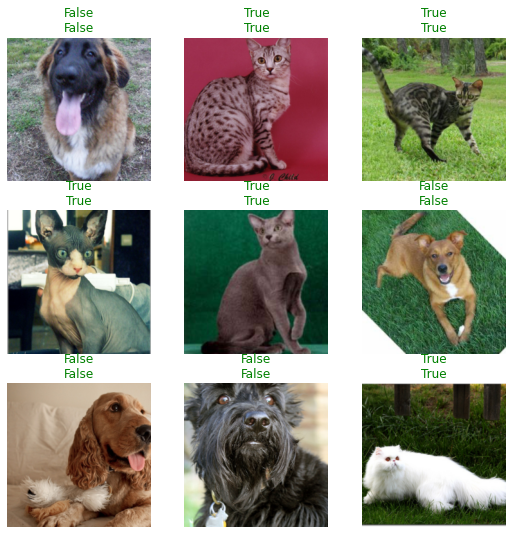

In [11]:
learner.show_results()